## IHDP

In [2]:
!pip install econml

In [2]:
from sklearn.model_selection import train_test_split # to split the data into train and test datasets 
from sklearn.preprocessing import StandardScaler # use of StandardScaler to standarise the dataset
import numpy as np # library of mathematical operations
import pandas as pd  # for data anlysis and manipulation
import matplotlib.pyplot as plt # to display charts
import seaborn as sns # data visualisation library

### Loading the dataset

In [3]:
ihdp = pd.read_csv("https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.csv", delimiter=",")
ihdp

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-1.853672,-2.201766,1.500917,0.161703,-0.129052,-1.023402,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.244050,5.269701,4.598246
743,-1.066845,-1.402238,1.128554,2.244320,0.371086,2.288910,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.253175,8.393338,0.940855
744,-1.045229,-1.337276,1.128554,-0.879606,0.683672,0.301522,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.908235,6.897207,4.373736
745,-0.115735,-0.602710,-1.105624,2.244320,0.558638,2.785756,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.324520,9.208251,0.352653


### Exploring the dataset

In [4]:
ihdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      747 non-null    float64
 1   x2      747 non-null    float64
 2   x3      747 non-null    float64
 3   x4      747 non-null    float64
 4   x5      747 non-null    float64
 5   x6      747 non-null    float64
 6   x7      747 non-null    float64
 7   x8      747 non-null    float64
 8   x9      747 non-null    float64
 9   x10     747 non-null    float64
 10  x11     747 non-null    float64
 11  x12     747 non-null    float64
 12  x13     747 non-null    float64
 13  x14     747 non-null    float64
 14  x15     747 non-null    float64
 15  x16     747 non-null    float64
 16  x17     747 non-null    float64
 17  x18     747 non-null    float64
 18  x19     747 non-null    float64
 19  x20     747 non-null    float64
 20  x21     747 non-null    float64
 21  x22     747 non-null    float64
 22  x2

In [5]:
nrow, ncol = ihdp.shape
print(f'There are {nrow} rows and {ncol} columns')

There are 747 rows and 29 columns


In [6]:
X = ihdp[["x1", 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
         'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 
         'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25' ]]

In [7]:
# reshaping the single dimension vectors into 2D vectors as some methods prefer this representaion of data
T = ihdp['t'].values.reshape(-1, 1)
Y = ihdp['yf'].values.reshape(-1, 1)
ite = ihdp['ite']

<AxesSubplot:>

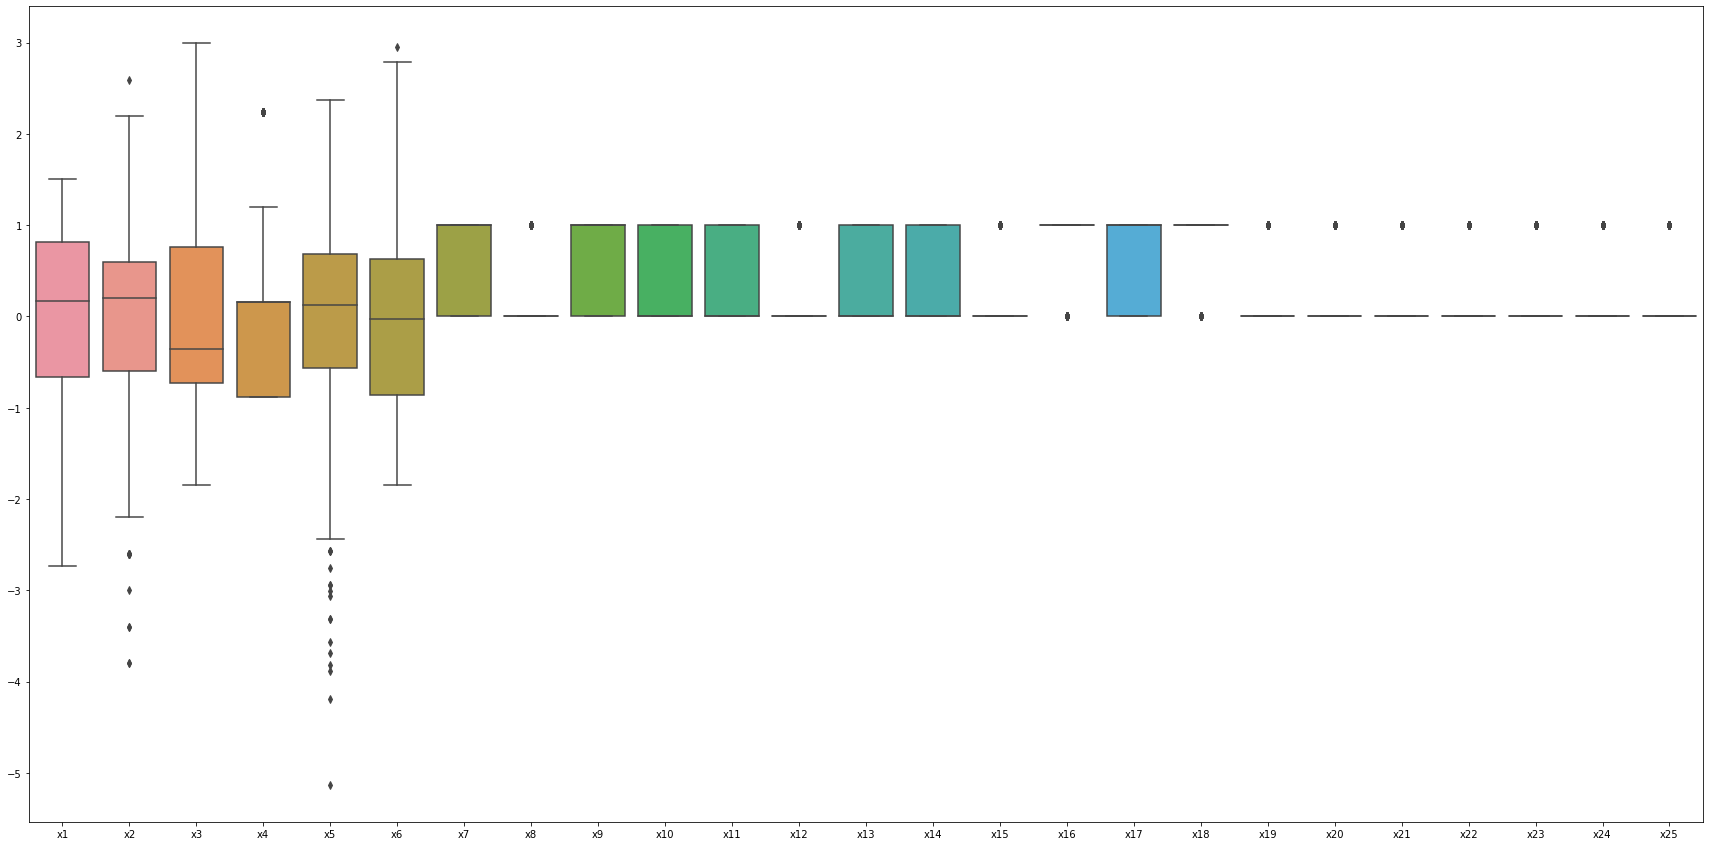

In [8]:
# to plot a boxplot of each feature in the dataset and check if the features vary in scale
plt.figure(figsize=(30,15))
sns.boxplot(data = X)

In [9]:
plt.savefig("ihdp_boxplot.pdf")

<Figure size 432x288 with 0 Axes>

array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>],
       [<AxesSubplot:title={'center':'x6'}>,
        <AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>],
       [<AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>,
        <AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>],
       [<AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:title={'center':'x19'}>,
        <AxesSubplot:title={'center':'x20'}>],
       [<AxesSubplot:title={'center':'x21'}>,
        <AxesSubplot:title={'center':'x

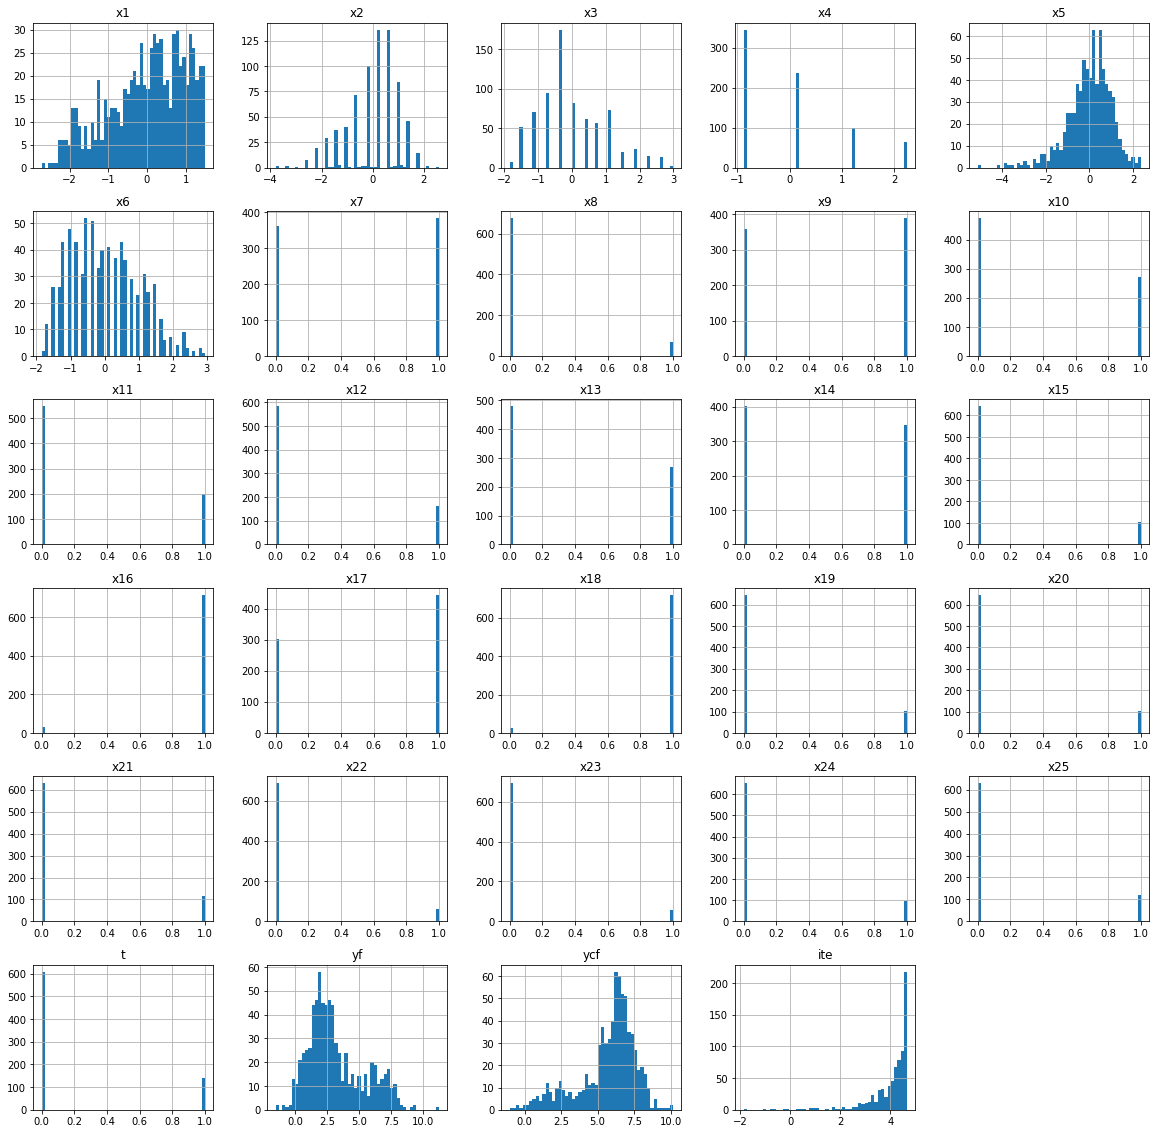

In [10]:
# to draw histogram and look at the distribution of values of each feature
ihdp.hist(bins=50, figsize=(20,20))

In [12]:
plt.savefig("ihdp_histogram.pdf")

<Figure size 432x288 with 0 Axes>

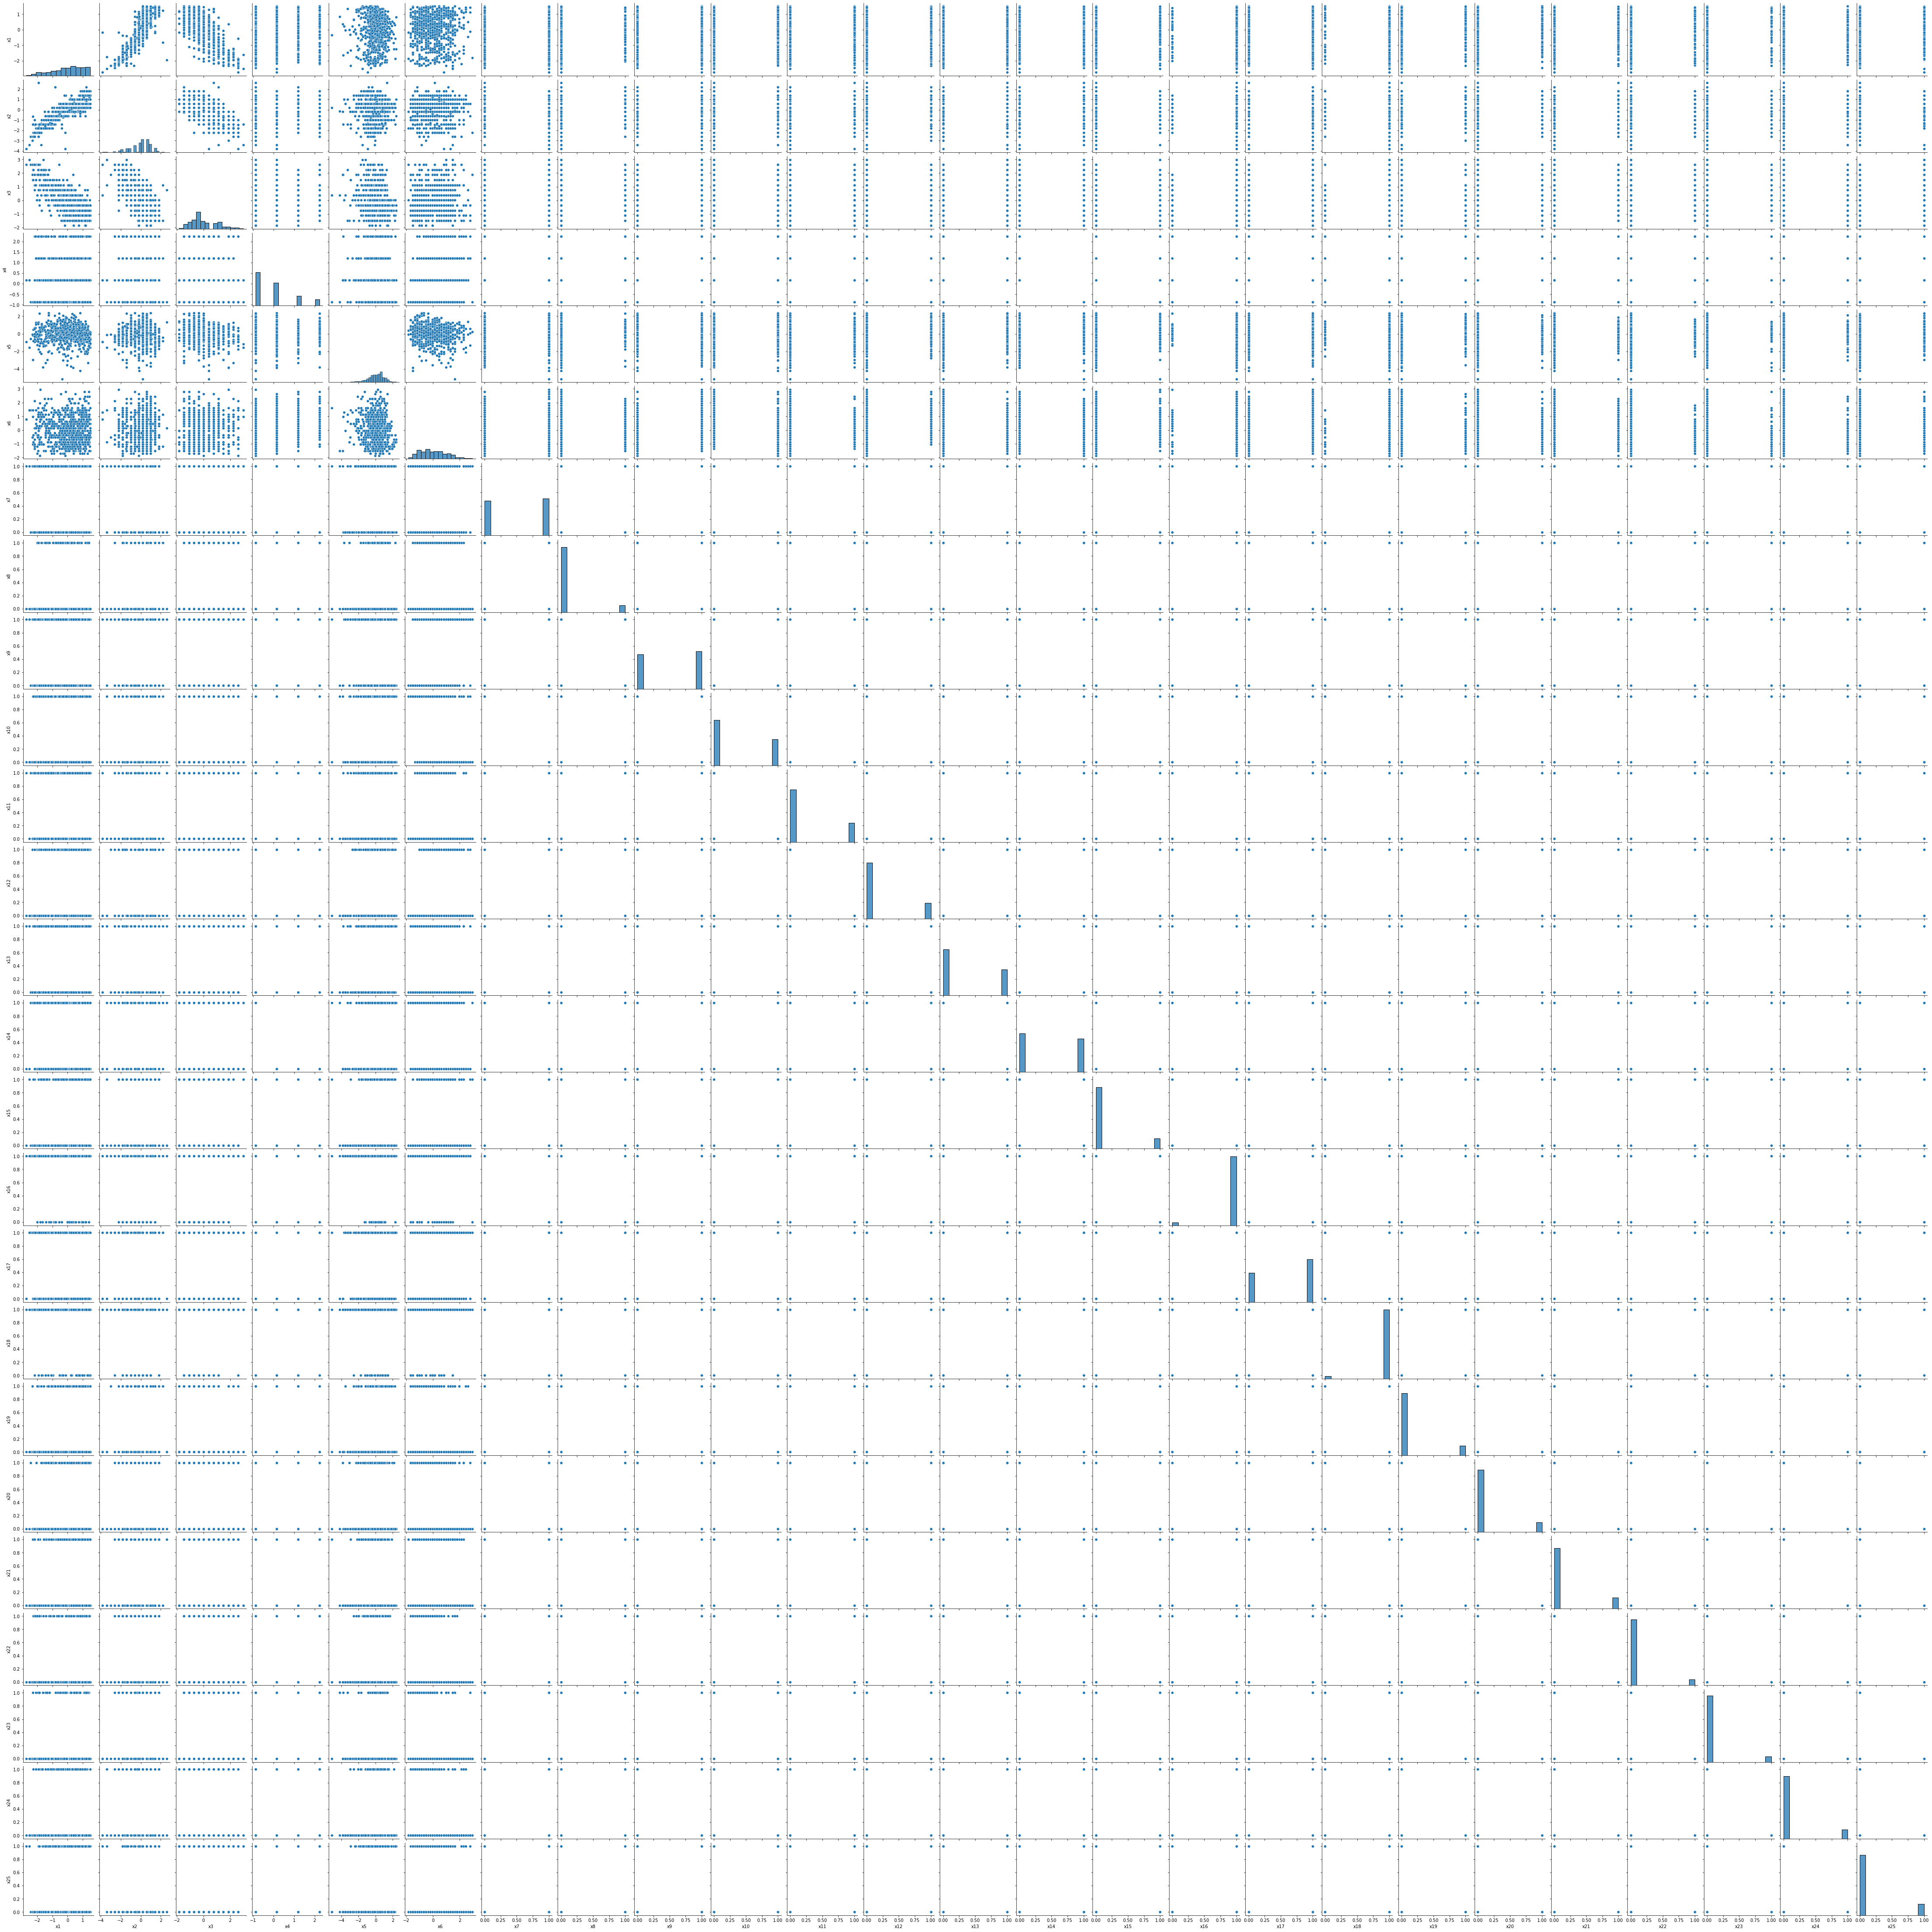

In [16]:
# to plot scatterplot across all the features
sns.pairplot(X)

In [14]:
plt.savefig("ihdp_scatterplot.pdf")

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

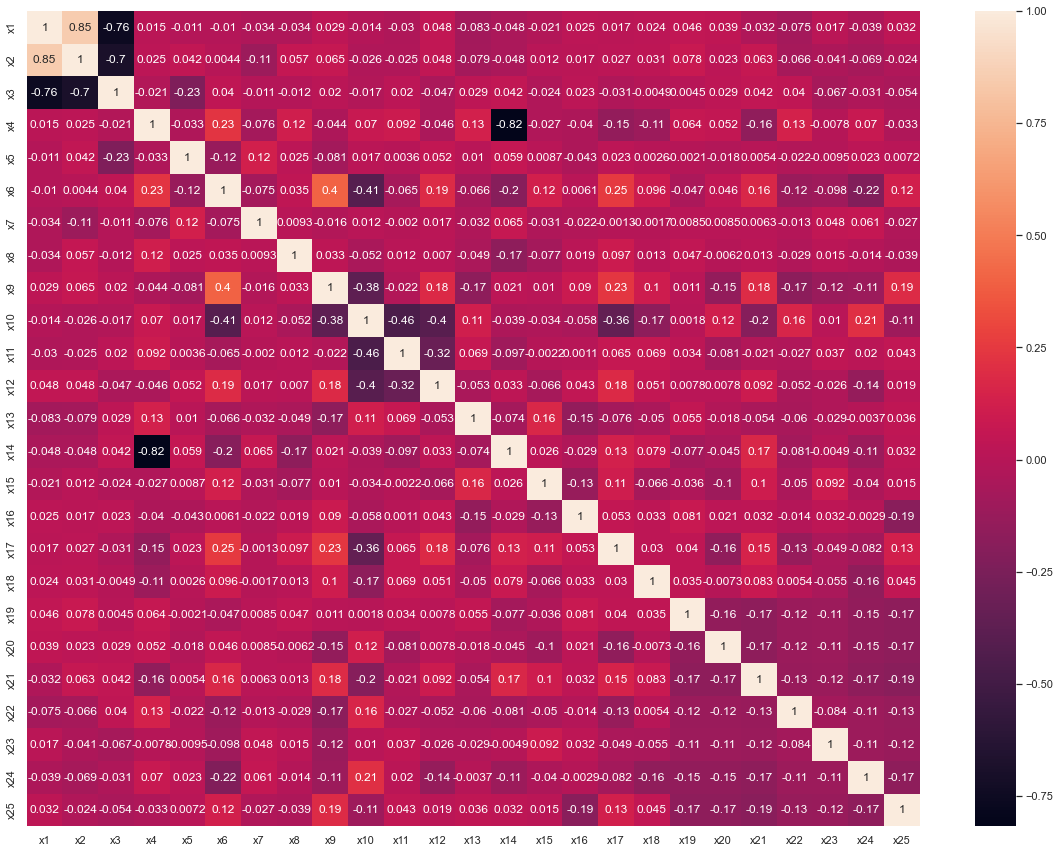

In [15]:
# to calculate the correlations between each pair of variables
cor = X.corr()

# to plot a heatmap of the correlations between pairs of features
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(cor, annot = True)

In [16]:
plt.savefig("ihdp_heatmap.pdf")

<Figure size 1440x1080 with 0 Axes>

### Data pre-processing

In [17]:
# to split the data into train and test datasets
x_train, x_test, t_train, t_test, y_train, y_test, ite_train, ite_test = train_test_split(X, T, Y, ite, test_size=0.2)

scaler_x = StandardScaler() # to standarise the dataset i.e. mean = 0 and s.d. = 1
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)